In [1]:
import numpy as np

Rx = np.array([[5,-1,-2],[-1,5,-1],[-2,-1,5]])
ryx = np.array([1,5.3,-3.9])

1.2.1 a) $$w_0 = R_x^{-1}*r_{yx}$$

In [2]:
w0 = np.linalg.solve(Rx,ryx)
print(w0)

[ 0.2  1.  -0.5]


1.2.1 b) $$E[xe] = E[x(y-xW)] = E[xy] - E[xx] * W = r_{xy} - R_x * W, W = R_x^{-1} * r_{xy} $$<br>
         $$E[xe] = r_{xy} - R_x * R_x^{-1} * r_{xy} = 0$$

1.2.1 c) using LS, assume ergodicity 
$$ \hat{R_x} = \sum(x[k] * x[k])/N $$
$$ \hat{r_{xy}} = \sum(x[k] * y[k])/N $$

1.2.2 d) when k --> infinity <br>
$$ w[k] = w_0 = R_x^{-1} * r_{xy} $$

1.2.2 e) $$a < 1/\lambda_{max}$$

In [470]:
lamb = np.linalg.eigvals(Rx)
lamb_max = max(lamb)
a = 1/lamb_max
print('elgvals =', lamb)
print('a_max =', a)

elgvals = [2.26794919 7.         5.73205081]
a_max = 0.1428571428571429


1.2.2 f) GD: $$ w[k+1] = w[k] + 2\alpha (r_{yx} - R_xw[k]) $$

In [3]:
# load data
import csv
from matplotlib import pyplot as plt
csv_reader = csv.reader(open("assignment1_data.csv"))

x = []
y = []
data = []

for row in csv_reader:
    x.append(float(row[0]))
    y.append(float(row[1]))
    data.append(row)

data = np.array(data)
x = np.array(x)
y = np.array(y)
print('data_shape =',data.shape)

data_shape = (10000, 2)


In [468]:
# GD
def GD(alpha,w_init,N):
    wk = w_init
    w = []
    for i in range(N):
        w.append(wk)
        wk = wk + 2*alpha*(ryx-Rx@wk)
    return np.array(w)

In [4]:
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error

# window = 3
x_stack = np.vstack((x, shift(x, 1), shift(x, 2))).T


w0 = np.linspace(-1, 1, 100)
w1 = np.linspace(0, 2, 100)
w2_fixed = -0.5
W0, W1 = np.meshgrid(w0, w1)
J = np.zeros((len(W0), len(W1)))

# compute the objective function J for each point in the grid

for i in range(len(W0)):
    for j in range(len(W1)):
        w_temp = np.array([W0[0, i], W1[j, 0], w2_fixed]).T
        J[j, i] =  mean_squared_error(y, x_stack@w_temp)

In [8]:
# contour
def contour(x,y,J,weight,title):
    fig, ax = plt.subplots(1, 1)
    # plots filled contour plot
    cp = ax.contourf(x, y, J)
    fig.colorbar(cp,label='J')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    plt.plot(weight[:,0],weight[:,1])
    plt.plot(0.2,1,'X',color = 'red')
    plt.title(title)

In [5]:
# initialization
N = data.shape[0]
w_init = np.zeros(3)

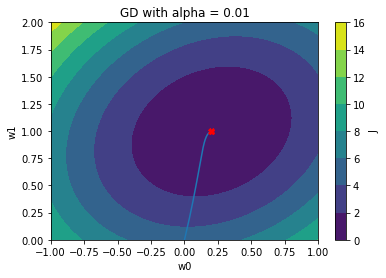

In [483]:
weight = GD(1e-2,w_init,N)
contour(w0,w1,J,weight,title='GD with alpha = 0.01')

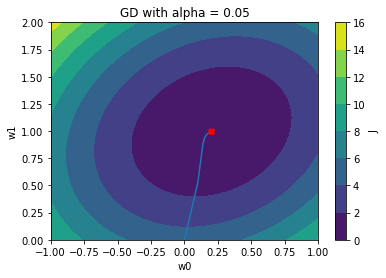

In [464]:
weight = GD(5e-2,w_init,N)
contour(w0,w1,J,weight,title='GD with alpha = 0.05')

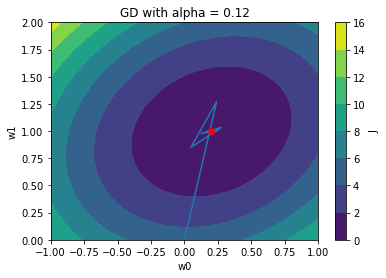

In [465]:
weight = GD(12e-2,w_init,N)
contour(w0,w1,J,weight,title='GD with alpha = 0.12')

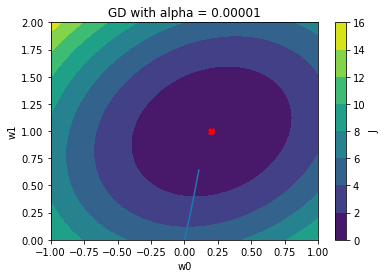

In [467]:
weight = GD(1e-5,w_init,N)
contour(w0,w1,J,weight,title='GD with alpha = 0.00001')

1.2.3 g)

1.2.3 h) $$ \alpha \in (0,1) $$

1.2.3 i) Newton: $$ w[k+1] = w[k] + 2\alpha R_x^{-1} (r_{yx} - R_xw[k]) $$

In [475]:
# Newton
def Newton(alpha,w_init,N):
    wk = w_init
    w = []
    for i in range(N):
        w.append(wk)
        wk = wk + 2*alpha*np.linalg.inv(Rx)@(ryx-Rx@wk)
    return np.array(w)


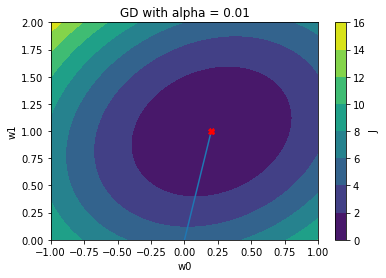

In [484]:
weight = Newton(1e-2,w_init,N)
contour(w0,w1,J,weight,title='Newton with alpha = 0.01')

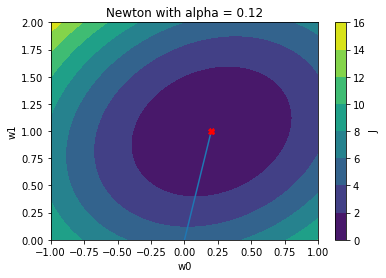

In [490]:
weight = Newton(12e-2,w_init,N)
contour(w0,w1,J,weight,title='Newton with alpha = 0.12')

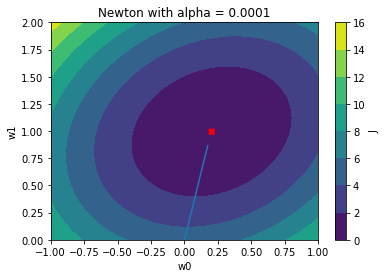

In [489]:
weight = Newton(1e-4,w_init,N)
contour(w0,w1,J,weight,title='Newton with alpha = 0.0001')

1.3.1 j) LMS: $$ w[k+1] = w[k] + 2\alpha x[k]*e[k]$$

In [514]:
# LMS
def LMS(alpha,w_init,N):
    wk = w_init
    w = []
    for i in range(N):
        w.append(wk)
        x_k = x_stack[i]
        y_h = wk@x_k
        e_k = y[i] - y_h
        wk = wk + 2 * alpha * e_k * x_k
    return np.array(w)


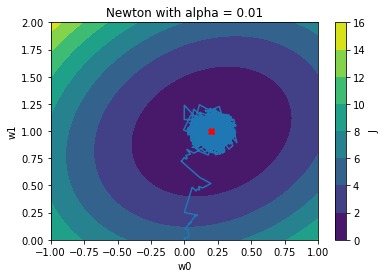

In [521]:
weight = LMS(1e-2,w_init,N)
contour(w0,w1,J,weight,title='LMS with alpha = 0.01')


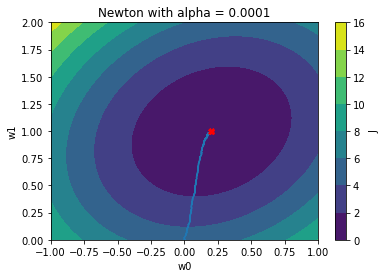

In [523]:
weight = LMS(1e-4,w_init,N)
contour(w0,w1,J,weight,title='LMS with alpha = 0.0001')

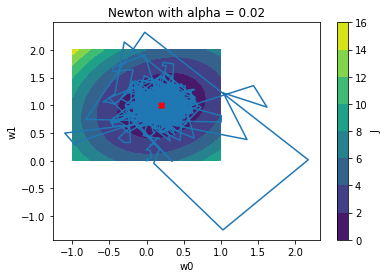

In [526]:
weight = LMS(2e-2,w_init,N)
contour(w0,w1,J,weight,title='LMS with alpha = 0.02')

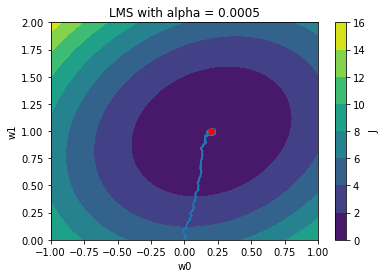

In [530]:
weight = LMS(5e-4,w_init,N)
contour(w0,w1,J,weight,title='LMS with alpha = 0.0005')

1.3.1 k) NLMS: $$ w[k+1] = w[k] + \frac{2\alpha x[k]*e[k]}{\sigma_x^{2}}$$

In [6]:
# NLMS
def NLMS(alpha,w_init,N):
    wk = w_init
    w = []
    for i in range(N):
        w.append(wk)
        x_k = x_stack[i]
        y_h = wk@x_k
        e_k = y[i] - y_h
        sigma = x_k@x_k/3 + 1e-8
        wk = wk + 2 * alpha * e_k * x_k / sigma
    return np.array(w)



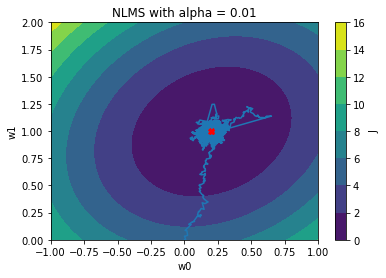

In [535]:
weight = NLMS(1e-2,w_init,N)
contour(w0,w1,J,weight,title='NLMS with alpha = 0.01')

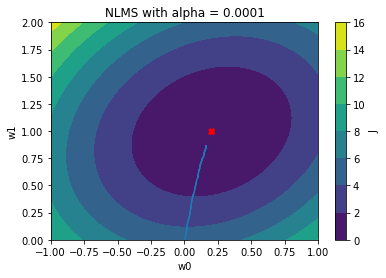

In [537]:
weight = NLMS(1e-4,w_init,N)
contour(w0,w1,J,weight,title='NLMS with alpha = 0.0001')

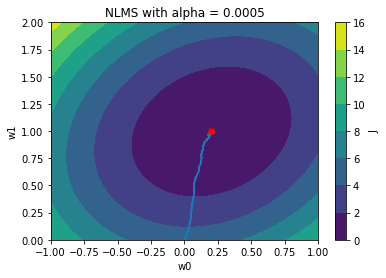

In [538]:
weight = NLMS(5e-4,w_init,N)
contour(w0,w1,J,weight,title='NLMS with alpha = 0.0005')

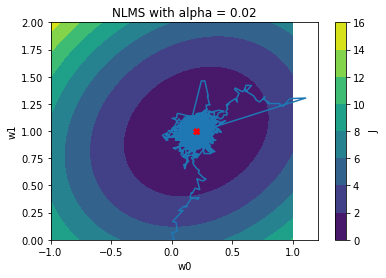

In [9]:
weight = NLMS(2e-2,w_init,N)
contour(w0,w1,J,weight,title='NLMS with alpha = 0.02')

1.3.1 l)

1.3.2 m) $$ g[k+1] = \frac{\hat{R_x^{-1}}[k]x[k+1]}{\gamma^2 + x^t[k+1]\hat{R_x^{-1}}x[k+1]} $$
$$ \hat{R_x^{-1}} = \gamma^{-2}(\hat{R_x^{-1}}-g[k+1]x^t[k+1]\hat{R_x^{-1}})$$
$$ \hat{r_{yx}}[k+1] = \gamma^{2}\hat{r_{yx}}[k]+x[k+1]y[k+1]$$
$$ w[k+1]=\hat{R_x^{-1}}r_{yx}[k+1]$$

In [860]:
# RLS
def RLS(gamma,w_init,ryx_init,inv_delta):
    wk = w_init
    w = []
    inv_Rx = inv_delta * np.identity(3)
    r_yx = ryx_init
    for i in range(N):
        w.append(wk)
        x_k = x_stack[[i]].T
        y_k = y[i]
        g = inv_Rx@x_k / (gamma**2 + x_k.T@inv_Rx@x_k)
        inv_Rx = gamma**(-2)*(inv_Rx - g@x_k.T*inv_Rx)
        r_yx = gamma**2*r_yx+x_k*y[i]
        wk = ((inv_Rx@r_yx).T).reshape(-1)
    return np.array(w)

In [864]:
# initialization
inv_delta = 0.001
ryx_init = np.zeros((3,1))
inv_Rx = inv_delta * np.identity(3)

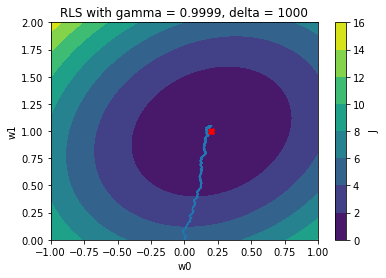

In [868]:
weight = RLS(0.9999,w_init,ryx_init,inv_delta)
contour(w0,w1,J,weight,title='RLS with gamma = 0.9999, delta = 1000')

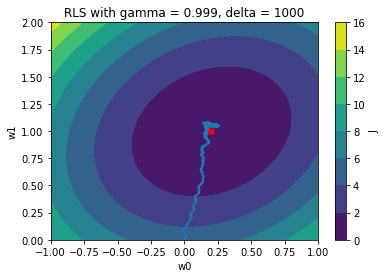

In [869]:
weight = RLS(0.999,w_init,ryx_init,inv_delta)
contour(w0,w1,J,weight,title='RLS with gamma = 0.999, delta = 1000')

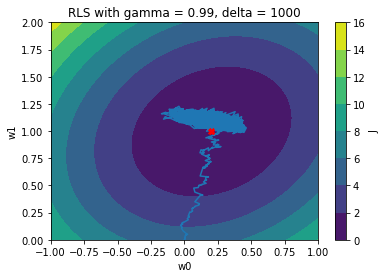

In [870]:
weight = RLS(0.99,w_init,ryx_init,inv_delta)
contour(w0,w1,J,weight,title='RLS with gamma = 0.99, delta = 1000')

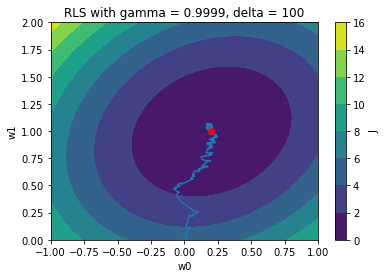

In [871]:
weight = RLS(0.9999,w_init,ryx_init,1e-2)
contour(w0,w1,J,weight,title='RLS with gamma = 0.9999, delta = 100')

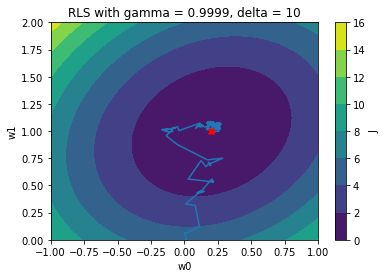

In [872]:
weight = RLS(0.9999,w_init,ryx_init,1e-1)
contour(w0,w1,J,weight,title='RLS with gamma = 0.9999, delta = 10')

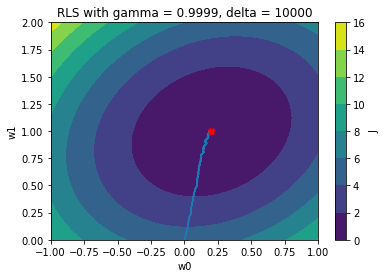

In [873]:
weight = RLS(0.9999,w_init,ryx_init,1e-4)
contour(w0,w1,J,weight,title='RLS with gamma = 0.9999, delta = 10000')

1.3.2 n)